In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def wavelength_correction(l):
    s = 1/l*1e8
#     print(s)
    n = 1+6432*1e-8+2949810/(146*1e8-s**2)+25540/(41*1e8-s**2)
    return(l/n)

In [3]:
# wavelength_correction(10000)

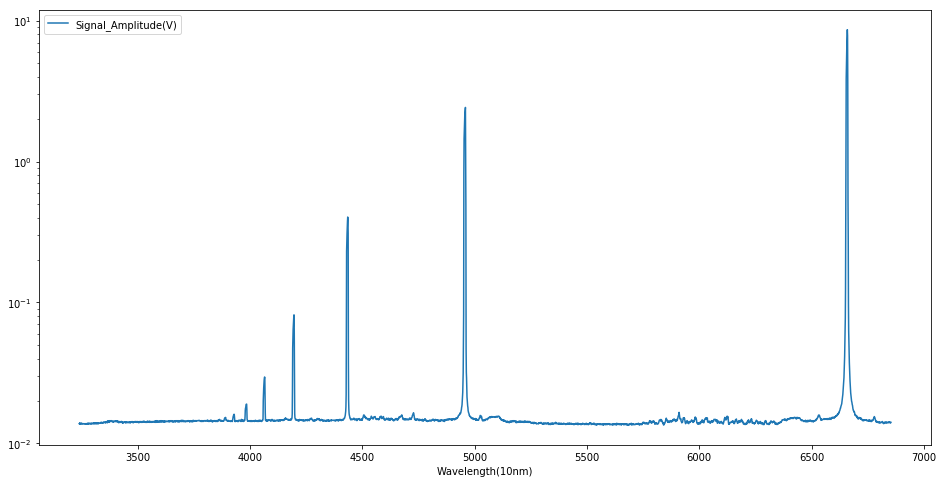

In [4]:
fig = pd.read_csv('hydrogen_high_res.csv').plot(x = 'Wavelength(10nm)',y = 'Signal_Amplitude(V)',figsize = (16,8))
plt.yscale('log')

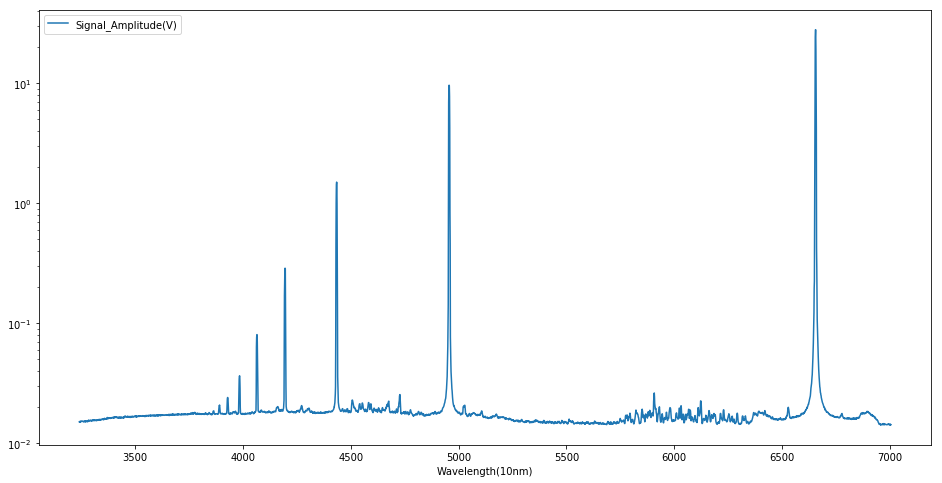

In [5]:
pd.read_csv('hydrogen_high_res1.csv').plot(x = 'Wavelength(10nm)',y = 'Signal_Amplitude(V)',figsize = (16,8))
plt.yscale('log')

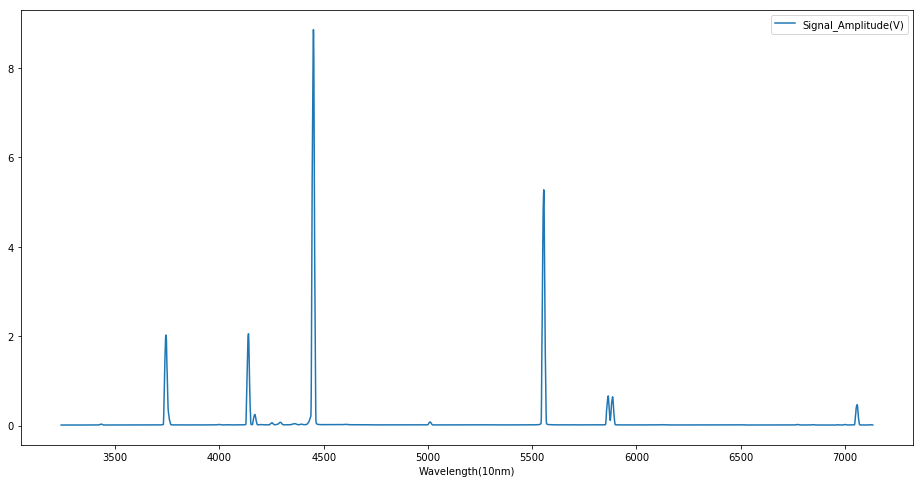

In [6]:
pd.read_csv('mercury_high_res.csv').plot(x = 'Wavelength(10nm)',y = 'Signal_Amplitude(V)',figsize = (16,8))
# plt.yscale('log')

# Mercury Spectrum

In [7]:
dat_Hg = pd.read_csv('mercury_high_res.csv')
lamba_Hg = dat_Hg['Wavelength(10nm)']
V_Hg = dat_Hg['Signal_Amplitude(V)']

/Users/wendy/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/wendy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/wendy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


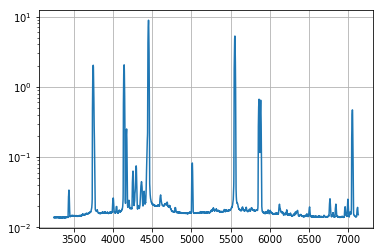

In [8]:
plt.plot(lamba_Hg,V_Hg)
plt.yscale('log')
plt.grid()

## Measured and Expected Peaks of Hg

In [9]:
def slice_peak(dat, peak,width = 10,offset = 0):
    peak += offset
    peak1 = peak + width
    peak2 = peak - width
    return dat[(dat['Wavelength(10nm)']<=peak1)&(dat['Wavelength(10nm)']>=peak2)]   

In [10]:
def func(x,mean,amp,std,mphw,d,e):
    gaussian = np.exp(-(x-mean)**2/2/std)
    lorenzian = 1/np.pi*1/2*mphw/((x-mean)**2+(1/2*mphw)**2)
    return gaussian*amp*lorenzian+d*x+e

In [11]:
peaks_Hg = [3131.6,3650.2,3654.8,3662.9,3906.4,4046.6,4077.8,
           4358.3,4916.0,5425.3,5460.7,5769.6,5790.7,
           5871.3,5888.9,6146.4,6149.4,7081.9,7346.5]
#https://physics.nist.gov/PhysRefData/Handbook/Tables/mercurytable2.htm

peaks_Hg_mes = [3433,3743.74,3999.68,4138.54,4170.,4200.33,4252.47,
                4292.61,4361.85,4394.58,4450.84,5010.71,5555.22,
               5864.22,5886.15,6772.38,6848.27,6966.24,7001.49,
               7059.04,7124.5]

In [41]:
#large peaks
peaks_Hg_mes = np.array([4139.31,4451.21,5556.17,5864.59,5885.94,7058.37])

peaks_Hg = np.array([4046.56,4358.33,5460.74,5769.60,5790.66,7081.90])

offset_Hg = []
errs = []
chi = []

for i in range(len(peaks_Hg)):
    n = i
    sliced_datt = slice_peak(dat_Hg,peaks_Hg_mes[n],width = 10)
    x = np.array(sliced_datt['Wavelength(10nm)'])-peaks_Hg_mes[n]
    ymax = max(sliced_datt['Signal_Amplitude(V)'])
    y = sliced_datt['Signal_Amplitude(V)']/ymax
    

    paras,err = optimize.curve_fit(func, x,y)

    offset_Hg += [paras[0]]
    errs += [np.sqrt(err[0][0])]
#     chi1 = sum()


offset_Hg = np.array(offset_Hg)
errs_Hg = np.array(errs)

In [42]:
xerr_Hg = np.sqrt(errs_Hg**2+np.full(6,0.5)**2)

In [43]:
peaks_Hg_mes = offset_Hg + peaks_Hg_mes

# peaks_Hg_mes = wavelength_correction(peaks_Hg_mes1)

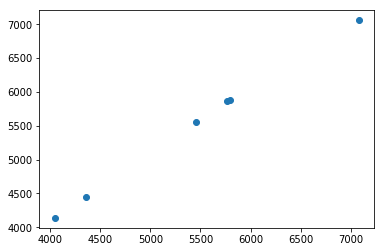

In [44]:
plt.scatter(peaks_Hg,peaks_Hg_mes)

### Fitting the data with linear, quadratic, and cubit order

In [45]:
def f1(x,a,b):
    return(a*x+b)
def f2(x,a,b,c):
    return a*x**2+ b*x+c
def f3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d
def f(x,y,ff,paras):
    return(ff(x,*paras)-y)

[24.14011732 14.28066324 21.85343711 31.16387875 32.11203042 46.70856479]
Chi: 4757.151978995373


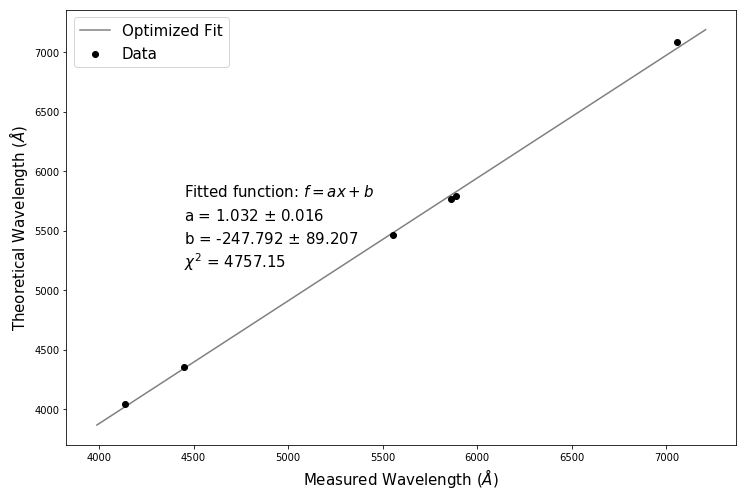

In [46]:
x = np.array(peaks_Hg_mes)
xx = np.linspace(min(x)-150,max(x)+150,100)
y = np.array(peaks_Hg)
paras1,err1 = optimize.curve_fit(f1,peaks_Hg_mes,peaks_Hg)


paras = paras1
err = err1

fitting_err = []
for i in range(len(peaks_Hg)):
    x_estimate = optimize.fsolve(f,x[i],args = (y[i],f1, paras))[0]
    x_err = np.absolute(x_estimate - x[i])
    fitting_err += [x_err]
    
fitting_err = np.array(fitting_err)
print(fitting_err)

chi = sum((fitting_err/xerr_Hg)**2)/(len(xerr_Hg)-2)
print('Chi:',chi)


plt.figure(figsize = (12,8))
plt.plot(xx,f1(xx,*paras),color = 'black',alpha = 0.5,label = 'Optimized Fit')
plt.scatter(x,y,color = 'black',label = 'Data')

plt.text(x[1],y[-2],r'Fitted function: $f = a x+b$',fontsize = 15)
plt.text(x[1],y[-2]-200,
         r'a = {a:.3f} $\pm$ {aerr:.3f}'.format(a = paras[0],aerr = np.sqrt(err[0][0])),
         fontsize = 15)
plt.text(x[1],y[-2]-400,r'b = {b:.3f} $\pm$ {berr:.3f}'.format(b = paras[1], berr = np.sqrt(err[1][1])),
         fontsize = 15)
plt.text(x[1],y[-2]-600,r'$\chi^2$ = {ch:.2f}'.format(ch = chi),fontsize = 15)

plt.xlabel(r'Measured Wavelength ($\AA$)',size = 15)
plt.ylabel(r'Theoretical Wavelength ($\AA$)',size = 15)

plt.legend(fontsize = 15)
plt.show()

[7.13342626 8.4151734  7.96321588 4.87558409 6.26131787 1.87998121]
Chi: 229.29771923684234


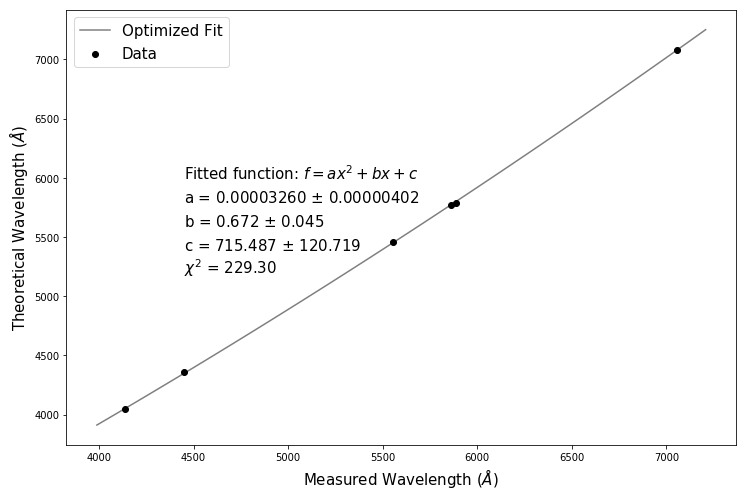

In [47]:
x = np.array(peaks_Hg_mes)
xx = np.linspace(min(x)-150,max(x)+150,100)
y = np.array(peaks_Hg)
paras2,err2 = optimize.curve_fit(f2,peaks_Hg_mes,peaks_Hg)

paras = paras2
err = err2

fitting_err = []
for i in range(len(peaks_Hg)):
    x_estimate = optimize.fsolve(f,x[i],args = (y[i],f2, paras))[0]
    x_err = np.absolute(x_estimate - x[i])
    fitting_err += [x_err]
    
fitting_err = np.array(fitting_err)
print(fitting_err)

chi = sum((fitting_err/xerr_Hg)**2)/(len(xerr_Hg)-2)
print('Chi:',chi)


plt.figure(figsize = (12,8))
plt.plot(xx,f2(xx,*paras),color = 'black',alpha = 0.5,label = 'Optimized Fit')
plt.scatter(x,y,color = 'black',label = 'Data')

plt.text(x[1],y[-2]+200,r'Fitted function: $f = a x^2+bx+c$',fontsize = 15)
plt.text(x[1],y[-2],r'a = {a:.8f} $\pm$ {aerr:.8f}'.format(a = paras[0],aerr = np.sqrt(err[0][0])),
         fontsize = 15)
plt.text(x[1],y[-2]-200,
         r'b = {b:.3f} $\pm$ {aerr:.3f}'.format(b = paras[1],aerr = np.sqrt(err[1][1])),
         fontsize = 15)
plt.text(x[1],y[-2]-400,r'c = {c:.3f} $\pm$ {berr:.3f}'.format(c = paras[2], berr = np.sqrt(err[2][2])),
         fontsize = 15)
plt.text(x[1],y[-2]-600,r'$\chi^2$ = {ch:.2f}'.format(ch = chi),fontsize = 15)

plt.xlabel(r'Measured Wavelength ($\AA$)',size = 15)
plt.ylabel(r'Theoretical Wavelength ($\AA$)',size = 15)

plt.legend(fontsize = 15)
plt.show()

[1.12738569 2.01057337 3.38359883 0.90271206 1.75404031 0.16046035]
Chi: 18.97451420279508


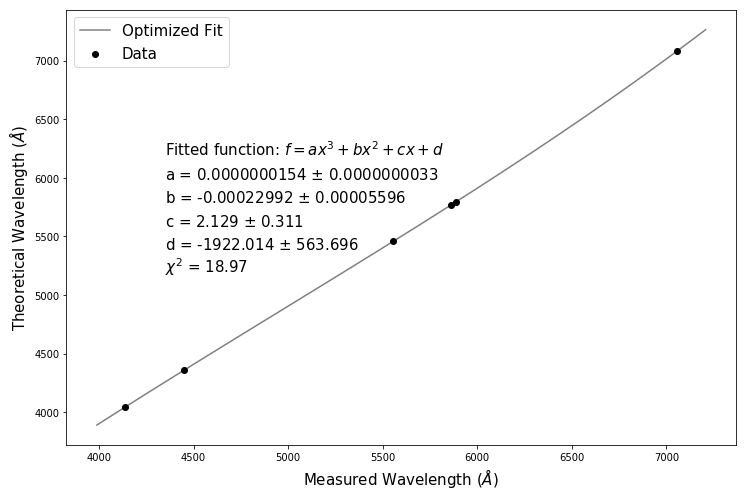

In [48]:
x = np.array(peaks_Hg_mes)
xx = np.linspace(min(x)-150,max(x)+150,100)
y = np.array(peaks_Hg)
paras3,err3 = optimize.curve_fit(f3,peaks_Hg_mes,peaks_Hg)

paras = paras3
err = err3


fitting_err = []
for i in range(len(peaks_Hg)):
    x_estimate = optimize.fsolve(f,x[i],args = (y[i],f3, paras))[0]
    x_err = np.absolute(x_estimate - x[i])
    fitting_err += [x_err]
    
fitting_err = np.array(fitting_err)
print(fitting_err)

chi = sum((fitting_err/xerr_Hg)**2)/(len(xerr_Hg)-2)
print('Chi:',chi)


plt.figure(figsize = (12,8))
plt.plot(xx,f3(xx,*paras),color = 'black',alpha = 0.5,label = 'Optimized Fit')
plt.scatter(x,y,color = 'black',label = 'Data')

plt.text(x[1]-100,y[-2]+400,r'Fitted function: $f = a x^3+bx^2+cx+d$',fontsize = 15)
plt.text(x[1]-100,y[-2]+200,r'a = {a:.10f} $\pm$ {aerr:.10f}'.format(a = paras[0],aerr = np.sqrt(err[0][0])),
         fontsize = 15)
plt.text(x[1]-100,y[-2],r'b = {a:.8f} $\pm$ {aerr:.8f}'.format(a = paras[1],aerr = np.sqrt(err[1][1])),
         fontsize = 15)
plt.text(x[1]-100,y[-2]-200,
         r'c = {b:.3f} $\pm$ {aerr:.3f}'.format(b = paras[2],aerr = np.sqrt(err[2][2])),
         fontsize = 15)
plt.text(x[1]-100,y[-2]-400,r'd = {c:.3f} $\pm$ {berr:.3f}'.format(c = paras[3], berr = np.sqrt(err[3][3])),
         fontsize = 15)
plt.text(x[1]-100,y[-2]-600,r'$\chi^2$ = {ch:.2f}'.format(ch = chi),fontsize = 15)

plt.xlabel(r'Measured Wavelength ($\AA$)',size = 15)
plt.ylabel(r'Theoretical Wavelength ($\AA$)',size = 15)

plt.legend(fontsize = 15)
plt.show()

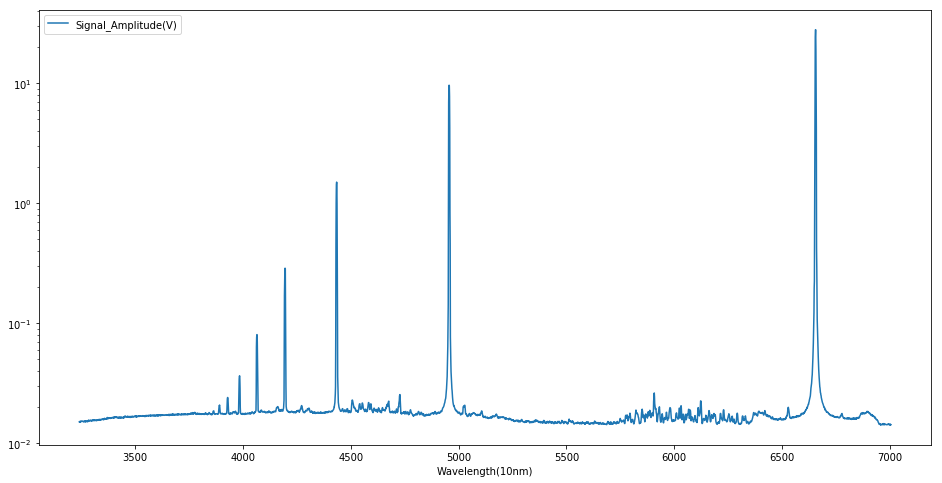

In [49]:
dat_H = pd.read_csv('hydrogen_high_res1.csv')
pd.read_csv('hydrogen_high_res1.csv').plot(x = 'Wavelength(10nm)',y = 'Signal_Amplitude(V)',figsize = (16,8))
plt.yscale('log')

In [50]:
peaks_H_mes = [6656.24,4956.53,4434.27,4195.19,4064.42,3928.6,3890.27]

In [51]:
offset_H = []
err_H = []
for i in range(len(peaks_H_mes)):
    n = i
    sliced_datt = slice_peak(dat_H,peaks_H_mes[n],width = 15)
    x = np.array(sliced_datt['Wavelength(10nm)'])-peaks_H_mes[n]
    y = sliced_datt['Signal_Amplitude(V)']/max(sliced_datt['Signal_Amplitude(V)'])

    paras,err = optimize.curve_fit(func, x,y)
    
#     plt.scatter(x,y)
#     plt.plot(x,func(x,*paras))
#     plt.show()
    
    offset_H += [paras[0]]
    err_H += [np.sqrt(err[0][[0]])]
offset_H = np.array(offset_H)
err_H = np.squeeze(np.array(err_H))

In [52]:
peaks_H_mes = offset_H + peaks_H_mes

# peaks_H_mes = wavelength_correction(peaks_H_mes1)

In [53]:
xerr_H = np.sqrt(err_H**2+np.full(7,0.5)**2)

In [59]:
f1(peaks_H_mes,*paras1)- [6562,4861,4340,4101,3970,3889,3835]

array([ 56.9766036 ,   4.43882389, -13.32993746, -21.44352419,
       -24.73930558, -83.84709331, -69.38812007])

In [60]:
f2(peaks_H_mes,*paras2)- [6562,4861,4340,4101,3970,3889,3835]

array([ 68.05588363, -15.93122894,  -5.5377017 ,   5.21354792,
        13.73877064, -31.85894154, -13.3696149 ])

In [54]:
f3(peaks_H_mes,*paras3)- [6562,4861,4340,4101,3970,3889,3835]

array([ 55.20606827,   1.26753126,   3.92202704,   1.51631528,
        -0.30584648, -59.38056816, -45.22158779])

In [94]:
H_fitted_mes3 = f3(peaks_H_mes,*paras3)
H_fitted_mes2 = f2(peaks_H_mes,*paras2)
H_fitted_mes1 = f1(peaks_H_mes,*paras1)

In [102]:
H_fitted_corrected = wavelength_correction(H_fitted_mes2)

In [154]:
params_err2 = np.sqrt(np.array([err2[0][0],err2[1][1],err2[2][2]]))

In [158]:
err3

array([[ 1.08388562e-17, -1.84187731e-13,  1.02243216e-09,
        -1.85050078e-06],
       [-1.84187731e-13,  3.13197198e-09, -1.73967667e-05,
         3.15057181e-02],
       [ 1.02243216e-09, -1.73967667e-05,  9.66943378e-02,
        -1.75227127e+02],
       [-1.85050078e-06,  3.15057181e-02, -1.75227127e+02,
         3.17753300e+05]])

In [155]:
params_err2 = max(params_err2)

In [156]:
params_err2

120.71931792765918

In [103]:
H_fitted_corrected

array([6628.2254663 , 4843.71550694, 4333.24394244, 4105.05510363,
       3982.61234704, 3856.04762599, 3820.5461852 ])

In [104]:
balmer = []
for i in range(len(H_fitted_corrected)):
    a = 1/(i+3)**2-1/4
    balmer += [-a]

In [105]:
def f0(x,a):
    return(a*x)

In [126]:
Ry_err

array([0.02651601])

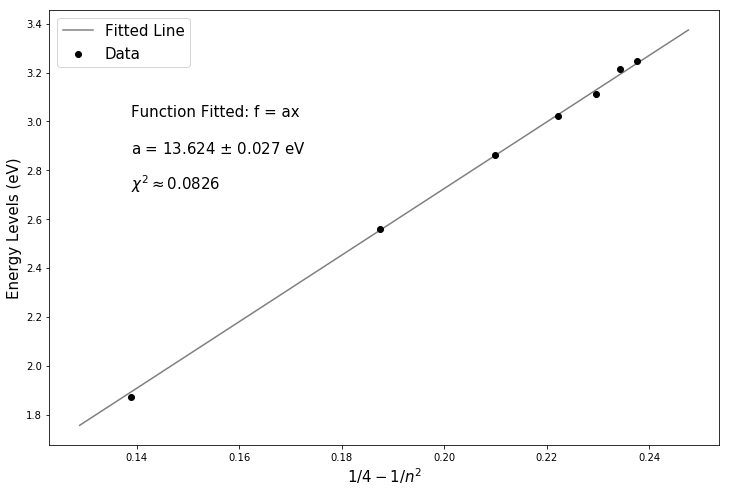

In [153]:
x = np.array(balmer)
xx = np.linspace(min(x)-0.01,max(x)+0.01,100)
y = 12398.425/H_fitted_corrected
y_err = 12398.425/H_fitted_corrected**2*params_err2

paras, err= optimize.curve_fit(f0,x,y)
Ry,Ry_err  = paras[0],np.sqrt(err[0])[0]

chi = sum((y-f0(x,Ry))**2/y_err**2)/(len(y)-1)

plt.figure(figsize = (12,8))
plt.scatter(x,y,color = 'black',label = 'Data')
plt.plot(xx,f0(xx,*paras),color = 'black',alpha = 0.5,label = 'Fitted Line')

plt.text(x[0],y[3],'Function Fitted: f = ax',fontsize = 15)
plt.text(x[0],y[3]-0.15,r'a = {a:.3f} $\pm$ {aerr:.3f} eV'.format(a = Ry, aerr = Ry_err),fontsize = 15)
plt.text(x[0],y[3]-0.3,r'$\chi^2 \approx {:.4f}$'.format(chi),fontsize = 15)



plt.xlabel(r'$1/4-1/n^2$',fontsize = 15)
plt.ylabel(r'Energy Levels (eV)',fontsize = 15)
plt.legend(fontsize = 15)



In [146]:
Ry_err

0.026516918828975354

In [147]:
Ry

13.623822480063245

In [148]:
y_err

array([0.03406817, 0.06379491, 0.07971077, 0.08881888, 0.09436419,
       0.10066037, 0.10253978])

In [149]:
chi

0.082618570138522

In [162]:
5003/wavelength_correction(5003)-5000/wavelength_correction(5000)

-7.909976895703608e-09

In [166]:
wavelength_correction(5000)#-wavelength_correction(5000)

4998.6056099667185

In [176]:
for i in range(3,15):
    g = 364.50682*(i**2)/(i**2-4)*10
    print('{:.2f}'.format(g))

6561.12
4860.09
4339.37
4100.70
3969.07
3888.07
3834.42
3796.95
3769.69
3749.21
3733.43
3721.01


Zeeman Calculations

In [212]:
Currents = [0,0.4,0.7,1.05,1.35,1.70,2.0]
fields = [0,1.60,2.90,4.40,5.70,7.15,7.95] #kG
field_err = 0.1

In [245]:
#585 line
r1 = 44
r2 = 56
r_split = [44,48,54,58,60,62,65]
r_split_nice = np.array([44,48,53,60])
r_fields = np.array([0,1.6,2.9,5.7])

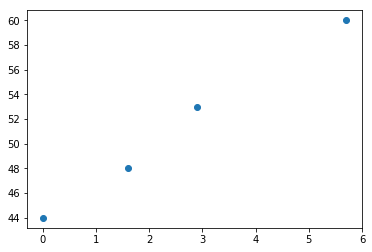

In [220]:
plt.scatter(r_fields,r_split_nice)

In [246]:
t = 8.11*1e-3/(5.29177210903*1e-11)
h = 2*np.pi
c = 137.036
r_split_nice_atomic = r_split_nice/(5.29177210903*1e-11)
r1_atomic = r1/(5.29177210903*1e-11)
r2_atomic = r2/(5.29177210903*1e-11)

r_fields_atomic = r_fields/(2.35051756758*1e5*1e4)

E = h*2*c/t*(r_split_nice_atomic**2-r1_atomic**2)/(r2_atomic**2-r1_atomic**2)

In [353]:
t = 8.11*1e-3#m
h = 6.62607*1e-34 #m^2kg/s
c = 2.99792*1e8 #m/s
#585 line
r1 = 44
r2 = 56
r_split_nice = np.array([44,48,53,60])
r_fields = np.array([0,1.6,2.9,5.7])
r_field_err = [0.1,0.1,0.1,0.1]

r1_err = 2
r2_err = 2
r_split_err = np.array([2,2,3,3])
E = h*2*c/t*(r_split_nice**2-r1**2)/(r2**2-r1**2)

In [291]:
optimize.curve_fit(f0,r_fields,E)

(array([1.18404285e-23]), array([[1.32432664e-49]]))

In [320]:
h*2*c/t*((r_split_nice+r_split_err)**2-(r1-2)**2)/((r2+2)**2-(-2+r1)**2)-E

array([1.07772481e-23, 1.69721246e-23, 6.36837389e-24, 7.41956381e-24])

In [325]:
a = []
for i in range(1000):
    dat = np.random.normal(r_split_nice,r_split_err)
    r11 = np.random.normal(r1,r1_err)
    r22 = np.random.normal(r2,r2_err)
    Ee = h*2*c/t*(dat**2-r11**2)/(r22**2-r11**2)
    field = np.random.normal(r_fields,0.1)
    para,_ = optimize.curve_fit(f0,r_fields,Ee)
    a +=[para[0]]
    
    



array([0.00000000e+00, 1.50228307e-23, 3.56384000e-23, 6.79293214e-23])

Text(0, 0.5, '$\\Delta$ E (Joules)')

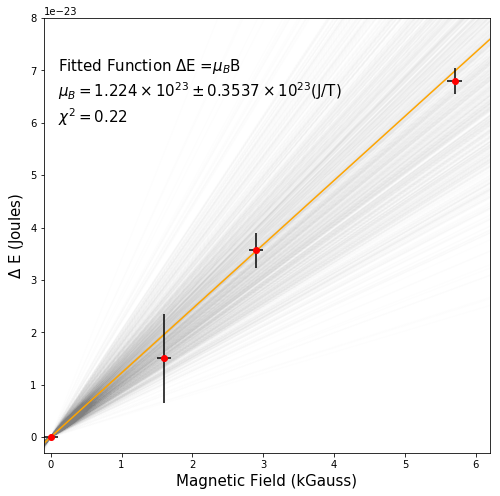

In [426]:
plt.figure(figsize = (8,8))
plt.scatter(r_fields,E,color = 'red',zorder = 100)
E_err = np.array([1.07772481e-25, 0.851246e-23, 3.36837389e-24, 2.41956381e-24])
plt.errorbar(r_fields,E,xerr = r_field_err,yerr = E_err,ls = 'None',color = 'black')
x = np.linspace(-0.1,6.2,100)
for i in a:
    plt.plot(x,i*x,color = 'grey',alpha = 0.01,zorder = -1)
    
    
a1 = np.mean(a)
plt.plot(x,a1*x,color = 'orange',zorder = 1)

a1_err = np.std(a)

chi = np.average(((E - f0(r_fields,a1))/E_err)**2)

plt.text(0.1,7e-23,r'Fitted Function $\Delta$E =$\mu_B$B',fontsize = 15)
plt.text(0.1,6.5e-23,r'$\mu_B = 1.224\times 10^{23}\pm0.3537\times10^{23}$(J/T)',fontsize = 15)
plt.text(0.1,6e-23,r'$\chi^2 = {:.2f}$'.format(chi),fontsize = 15)


plt.ylim(-3e-24,8e-23)
plt.xlim(-0.1,6.2)
plt.xlabel('Magnetic Field (kGauss)',fontsize = 15)
plt.ylabel(r'$\Delta$ E (Joules)',fontsize = 15)

In [420]:
chi

0.22163923146491937

In [394]:
a1_err*1e23

0.3537293093705489

In [348]:
np.mean(a)

1.2380615550328373e-23

In [308]:
np.std(a)

4.8697646223991165e-24

In [229]:
E = h*2*c/t*((r_split_nice+)**2-r1**2)/(r2**2-r1**2)

array([0.00000000e+00, 1.50228307e-26, 3.56384000e-26, 6.79293214e-26])

(-1e-10, 3e-09)

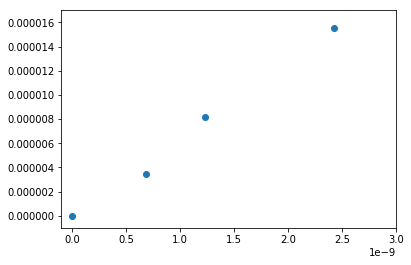

In [252]:
plt.scatter(r_fields_atomic,E)
plt.ylim(-1e-6,1.7e-5)
plt.xlim(-1e-10,3e-9)

In [263]:
optimize.curve_fit(f0,r_fields,E)

(array([1.18404285e-23]), array([[1.32432664e-49]]))

<function __main__.f0(x, a)>

<function __main__.f1(x, a, b)>

In [178]:
ml_3D3 = [-3,-2,-1,0,1,2,3]
ml_3D2 = [-2,-1,0,1,2]
ml_3D1 = [-1,0,1]

ms_3 = [-1,0,1]

ml_3P2 = ml_3D2
ml_3P1 = ml_3D1
ml_3P0 = [0]




In [209]:
res = []

for i in ml_3D3:
    for j in ms_3:
        if i == 0:
            pass
        else:
            print(i*g(np.absolute(i),np.absolute(j),1),i,j)
            res += [i*g(np.absolute(i),np.absolute(j),1)]
        
for i in ml_3D2:
    for j in ms_3:
        if i == 0:
            pass
        else:
            print(i*g(np.absolute(i),np.absolute(j),1),i,j)
            res += [i*g(np.absolute(i),np.absolute(j),1)]
        
for i in ml_3D1:
    for j in ms_3:
        if i == 0:
            pass
        else:
            print(i*g(np.absolute(i),np.absolute(j),1),i,j)
            res += [i*g(np.absolute(i),np.absolute(j),1)]
set(res)

-4.5 -3 -1
-4.25 -3 0
-4.5 -3 1
-3.0 -2 -1
-2.6666666666666665 -2 0
-3.0 -2 1
-1.5 -1 -1
-1.0 -1 0
-1.5 -1 1
1.5 1 -1
1.0 1 0
1.5 1 1
3.0 2 -1
2.6666666666666665 2 0
3.0 2 1
4.5 3 -1
4.25 3 0
4.5 3 1
-3.0 -2 -1
-2.6666666666666665 -2 0
-3.0 -2 1
-1.5 -1 -1
-1.0 -1 0
-1.5 -1 1
1.5 1 -1
1.0 1 0
1.5 1 1
3.0 2 -1
2.6666666666666665 2 0
3.0 2 1
-1.5 -1 -1
-1.0 -1 0
-1.5 -1 1
1.5 1 -1
1.0 1 0
1.5 1 1


{-4.5,
 -4.25,
 -3.0,
 -2.6666666666666665,
 -1.5,
 -1.0,
 1.0,
 1.5,
 2.6666666666666665,
 3.0,
 4.25,
 4.5}

In [189]:
set(res)

{-4, -3, -2, -1, 0, 1, 2, 3, 4}

In [208]:
res = []

for i in ml_3P2:
    for j in ms_3:
        if i == 0:
            pass
        else:
            print(i*g(np.absolute(i),np.absolute(j),1),i,j)
            res += [i*g(np.absolute(i),np.absolute(j),1)]
        
for i in ml_3P1:
    for j in ms_3:
        if i == 0:
            pass
        else:
            print(i*g(np.absolute(i),np.absolute(j),1),i,j)
            res += [i*g(np.absolute(i),np.absolute(j),1)]

for i in ml_3P0:
    for j in ms_3:
        if i == 0:
            pass
        else:
            print(i*g(np.absolute(i),np.absolute(j),1),i,j)
            res += [i*g(np.absolute(i),np.absolute(j),1)]
set(res)

-3.0 -2 -1
-2.6666666666666665 -2 0
-3.0 -2 1
-1.5 -1 -1
-1.0 -1 0
-1.5 -1 1
1.5 1 -1
1.0 1 0
1.5 1 1
3.0 2 -1
2.6666666666666665 2 0
3.0 2 1
-1.5 -1 -1
-1.0 -1 0
-1.5 -1 1
1.5 1 -1
1.0 1 0
1.5 1 1


{-3.0, -2.6666666666666665, -1.5, -1.0, 1.0, 1.5, 2.6666666666666665, 3.0}

In [207]:
set(res)

{-4.5,
 -4.25,
 -3.0,
 -2.6666666666666665,
 -1.5,
 -1.0,
 1.0,
 1.5,
 2.6666666666666665,
 3.0,
 4.25,
 4.5}

In [193]:
def g(j,s,l):
    return(1+(j*(j+1)+s*(s+1)-l*(l+1))/(2*j*(j+1)))